<a href="https://colab.research.google.com/github/prtk0007/Chest_Xray_detection/blob/main/project_ray_8_commn_interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 23.3MB/s]
100% 2.29G/2.29G [00:31<00:00, 79.2MB/s]


In [ ]:
!unzip \*.zip

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.models import load_model
import os
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  after removing the cwd from sys.path.


In [ ]:
model = load_model('/content/drive/MyDrive/Kaggle/Inceptv3_xray.h5')

In [ ]:
X_test = []
y_test = []
size = 180
os.chdir('/content/chest_xray/test/NORMAL')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(size,size))   
      X_test.append(img)
      y_test.append("0") 
os.chdir('/content/chest_xray/test/PNEUMONIA')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(size,size))   
      X_test.append(img)
      y_test.append("1") 

In [ ]:
X_test = np.array(X_test)  
y_test = np.array(y_test) 
predicted_classes = model.predict(X_test) 
y_test = y_test.astype('int64')

In [ ]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
print('\n\n\t\t0 Class Represents Normal & 1 Class Represents Pnemonia')
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {y_test[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
def predict(img):
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  img_data = preprocess_input(x)
  classes = model.predict(img_data)
  print("Actual class: ", actual)
  if classes[0][0] > 0.65:
          print("Predicted class: Normal")
          return 'NORMAL'
  else:
          print("Predicted class: Pneumonia")
          return 'Pneumonia'


Enter the Absolute path of image/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg
Actual class:  PNEUMONIA
Predicted class: Pneumonia


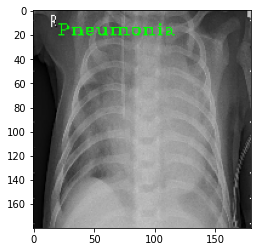

In [ ]:
path = input("Enter the Absolute path of image")
actual= os.path.basename(os.path.dirname(path))
img = image.load_img(path, target_size=(180,180))
pred = predict(img)
texted_img = cv2.putText(img=np.copy(img),text=pred,org=(20,20),fontFace=5,fontScale=0.7,color=(0,255,0))
plt.imshow(texted_img)

In [ ]:
path = input("Enter the Absolute path of image")
actual= os.path.basename(os.path.dirname(path))
img = image.load_img(path, target_size=(180,180))
pred = predict(img)
texted_img = cv2.putText(img=np.copy(img),text=pred,org=(50,50),fontFace=0,fontScale=1,color=(0,0,2))
plt.imshow(texted_img)

Actual class:  NORMAL
Predicted class: Normal


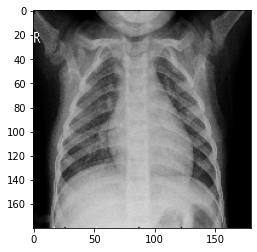

In [ ]:
path = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'
actual= os.path.basename(os.path.dirname(path))
img = image.load_img(path, target_size=(180,180))
plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print("Actual class: ", actual)
if classes[0][0] > 0.65:
        print("Predicted class: Normal")
else:
        print("Predicted class: Pneumonia")

In [ ]:
actual

'NORMAL'

In [ ]:
predictions = 

In [ ]:
binary_predictions = []
threshold = 
for i in predictions:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if (binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='red')
plt.show()

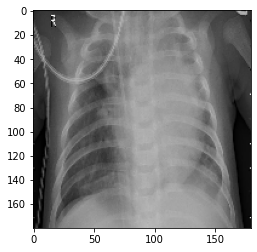

In [ ]:
X_test = []
y_test = []
size = 180
os.chdir('/content/chest_xray/test/NORMAL')
for i in tqdm(os.listdir()):
      img = image.load_img(path, target_size=(180,180))
      plt.imshow(img)
      x=image.img_to_array(img)
      x=np.expand_dims(x, axis=0)
      img_data = preprocess_input(x)  
      X_test.append(img)
      y_test.append("0") 
os.chdir('/content/chest_xray/test/PNEUMONIA')
for i in tqdm(os.listdir()):
      img = image.load_img(path, target_size=(180,180))
      x=image.img_to_array(img)
      x=np.expand_dims(x, axis=0)
      img_data = preprocess_input(x)
      X_test.append(img)
      y_test.append("1") 